# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
pd.read_csv("lab12_files/US_Baby_Names_right.csv")

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names=pd.read_csv("lab12_files/US_Baby_Names_right.csv")
print(baby_names.dtypes)
print(type(baby_names))
print(len(baby_names))


Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [5]:
baby_names.drop(["Unnamed: 0","Id"],inplace=True,axis=1)

In [6]:
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
baby_names.Gender.value_counts()

Gender
F    558846
M    457549
Name: count, dtype: int64

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [13]:
df2=baby_names.groupby('Name')['Count'].sum().sort_values(ascending=False)
df_F=baby_names.where(baby_names['Gender']=='F').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
df_M=baby_names.where(baby_names['Gender']=='M').groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
df2.head(10)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

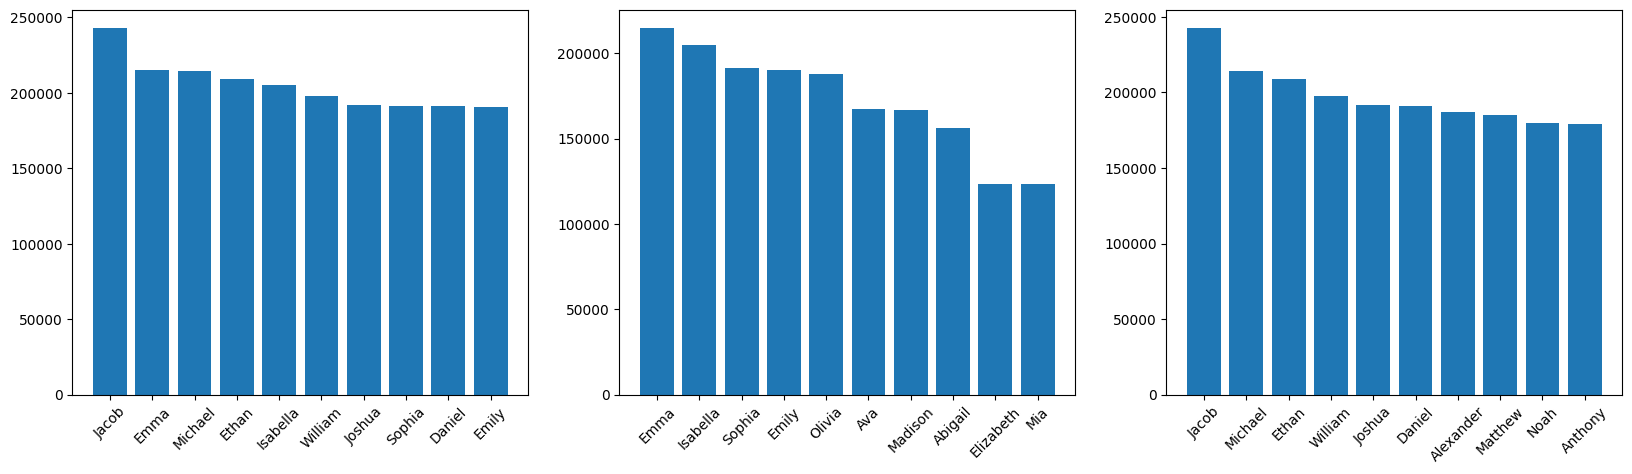

In [10]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
axes[0].bar(df2.index,df2.values)
axes[1].bar(df_F.index,df_F.values)
axes[2].bar(df_M.index,df_M.values)

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [15]:
baby_names['Name'].nunique()

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [41]:
rng = np.random.default_rng()
#probs=baby_names['Name'].value_counts()/baby_names['Name'].count()
#rng_indexes=baby_names['Name'].value_counts().index.to_numpy()
#rng_indexes[rng.multinomial(1,probs).argmax()]

probs=(df2/df2.sum())
rng_indexes=df2.index.to_numpy()
rng_indexes[rng.multinomial(1,probs).argmax()]


'Dylan'

In [29]:
df2

Name
Jacob         242874
Emma          214852
Michael       214405
Ethan         209277
Isabella      204798
               ...  
Eniola             5
Atlantis           5
Marci              5
Simarpreet         5
Nita               5
Name: Count, Length: 17632, dtype: int64

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [27]:
print(df2.head(1))
print(df2.mean())
print(df2.median())
print(df2.std())


Name
Jacob    242874
Name: Count, dtype: int64
2008.932168784029
49.0
11006.069467890571


In [28]:
df2

Name
Jacob         242874
Emma          214852
Michael       214405
Ethan         209277
Isabella      204798
               ...  
Eniola             5
Atlantis           5
Marci              5
Simarpreet         5
Nita               5
Name: Count, Length: 17632, dtype: int64

## Część II

Krok 1: Wczytaj dane

In [12]:
df=pd.read_csv('./lab12_files/ocupation.csv',sep='|')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Krok 2: Podejrzyj pierwsze 25 rekordów

In [13]:
df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [14]:
df.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [18]:
print(df.shape[0],"Rows")
print(df.shape[1],"Columns")

943 Rows
5 Columns


Krok 5: Wypisz nazwy kolumn

In [22]:
", ".join(df.columns)

'user_id, age, gender, occupation, zip_code'

Krok 6: Ile różnych zawodów jest w zbiorze?

In [27]:
x=pd.unique(df.occupation)
print(x)
print(len(x))

['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']
21


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

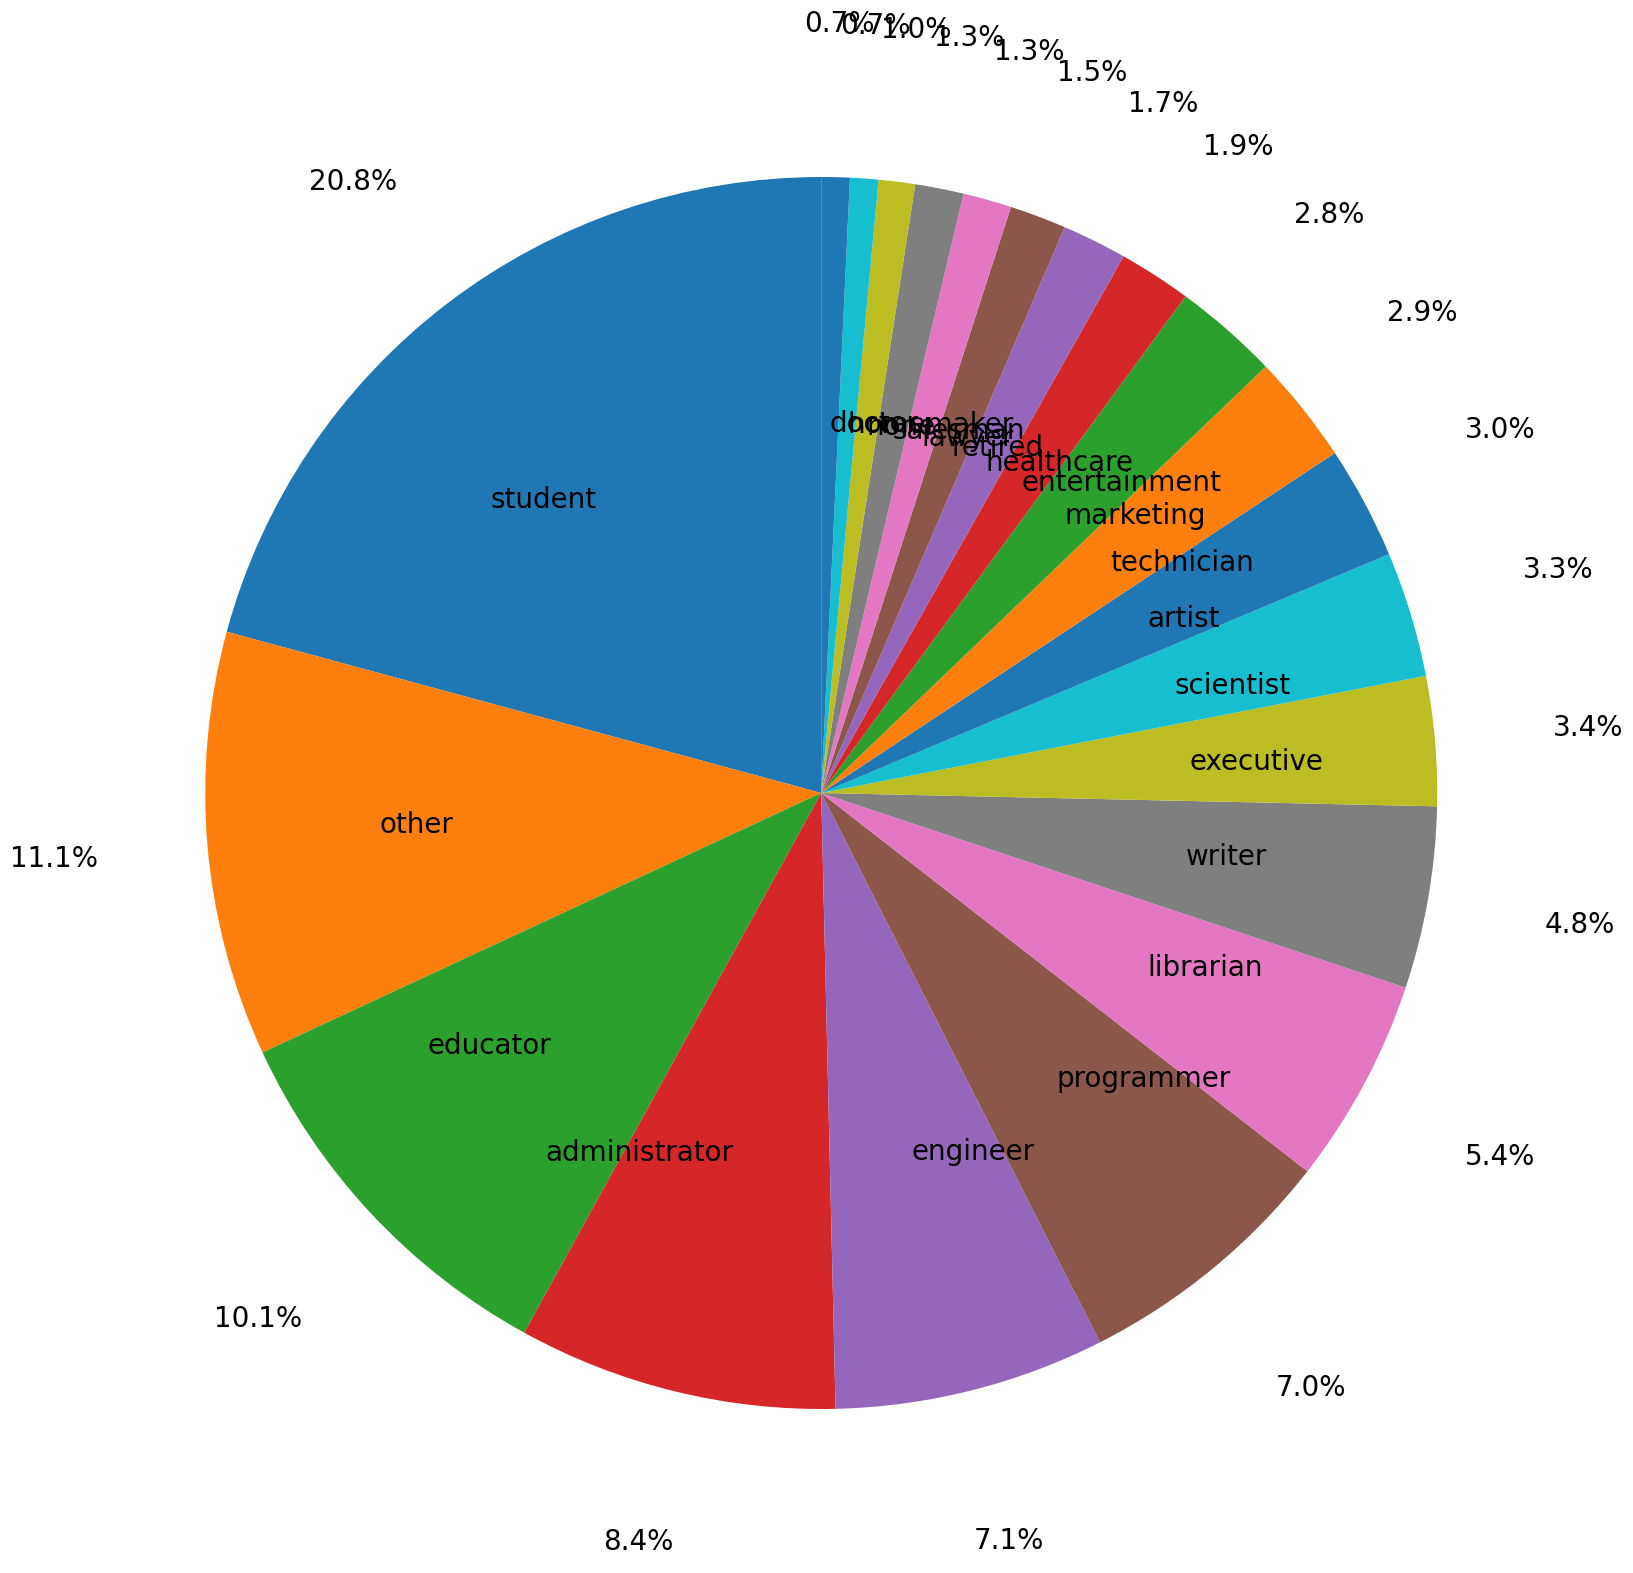

In [97]:
fig1, ax1 = plt.subplots(figsize=(20,20))
data=df.occupation.value_counts()
ax1.pie(data.values,labels=data.index,startangle=90,autopct='%1.1f%%', textprops={'fontsize': 20},pctdistance=1.25, labeldistance=.6)
plt.show()

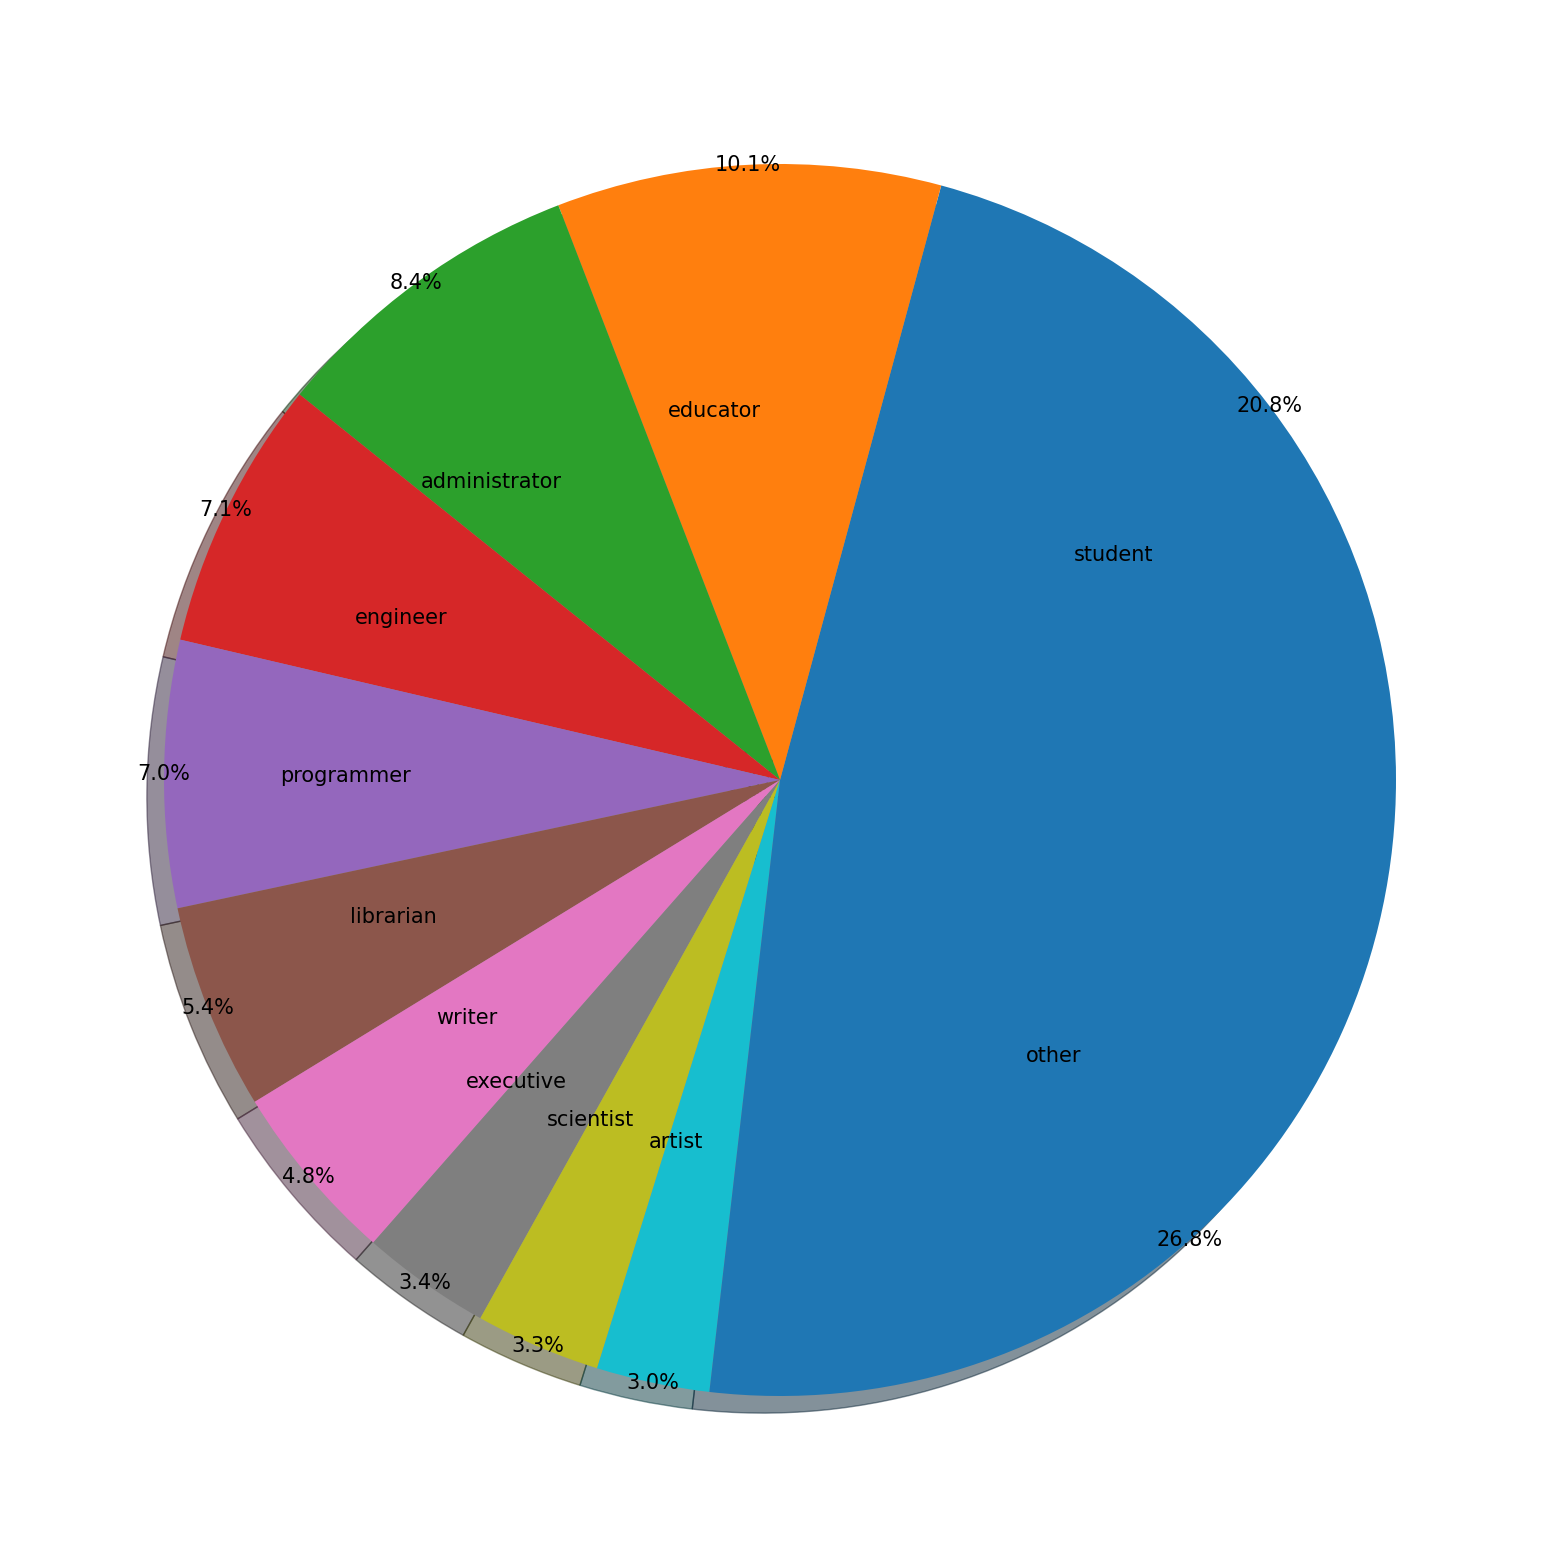

In [103]:
fig1, ax1 = plt.subplots(figsize=(20,20))
x=df.occupation.value_counts()
data=df[df.occupation!='other'].occupation.value_counts()
number_of_others=sum(data.values)-sum(data.values[:10])
top10=data[:10]
top10['other']=x['other']+number_of_others
ax1.pie(top10.values,labels=top10.index,autopct='%1.1f%%', textprops={'fontsize': 15},pctdistance=1,shadow=True, labeldistance=.6)
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

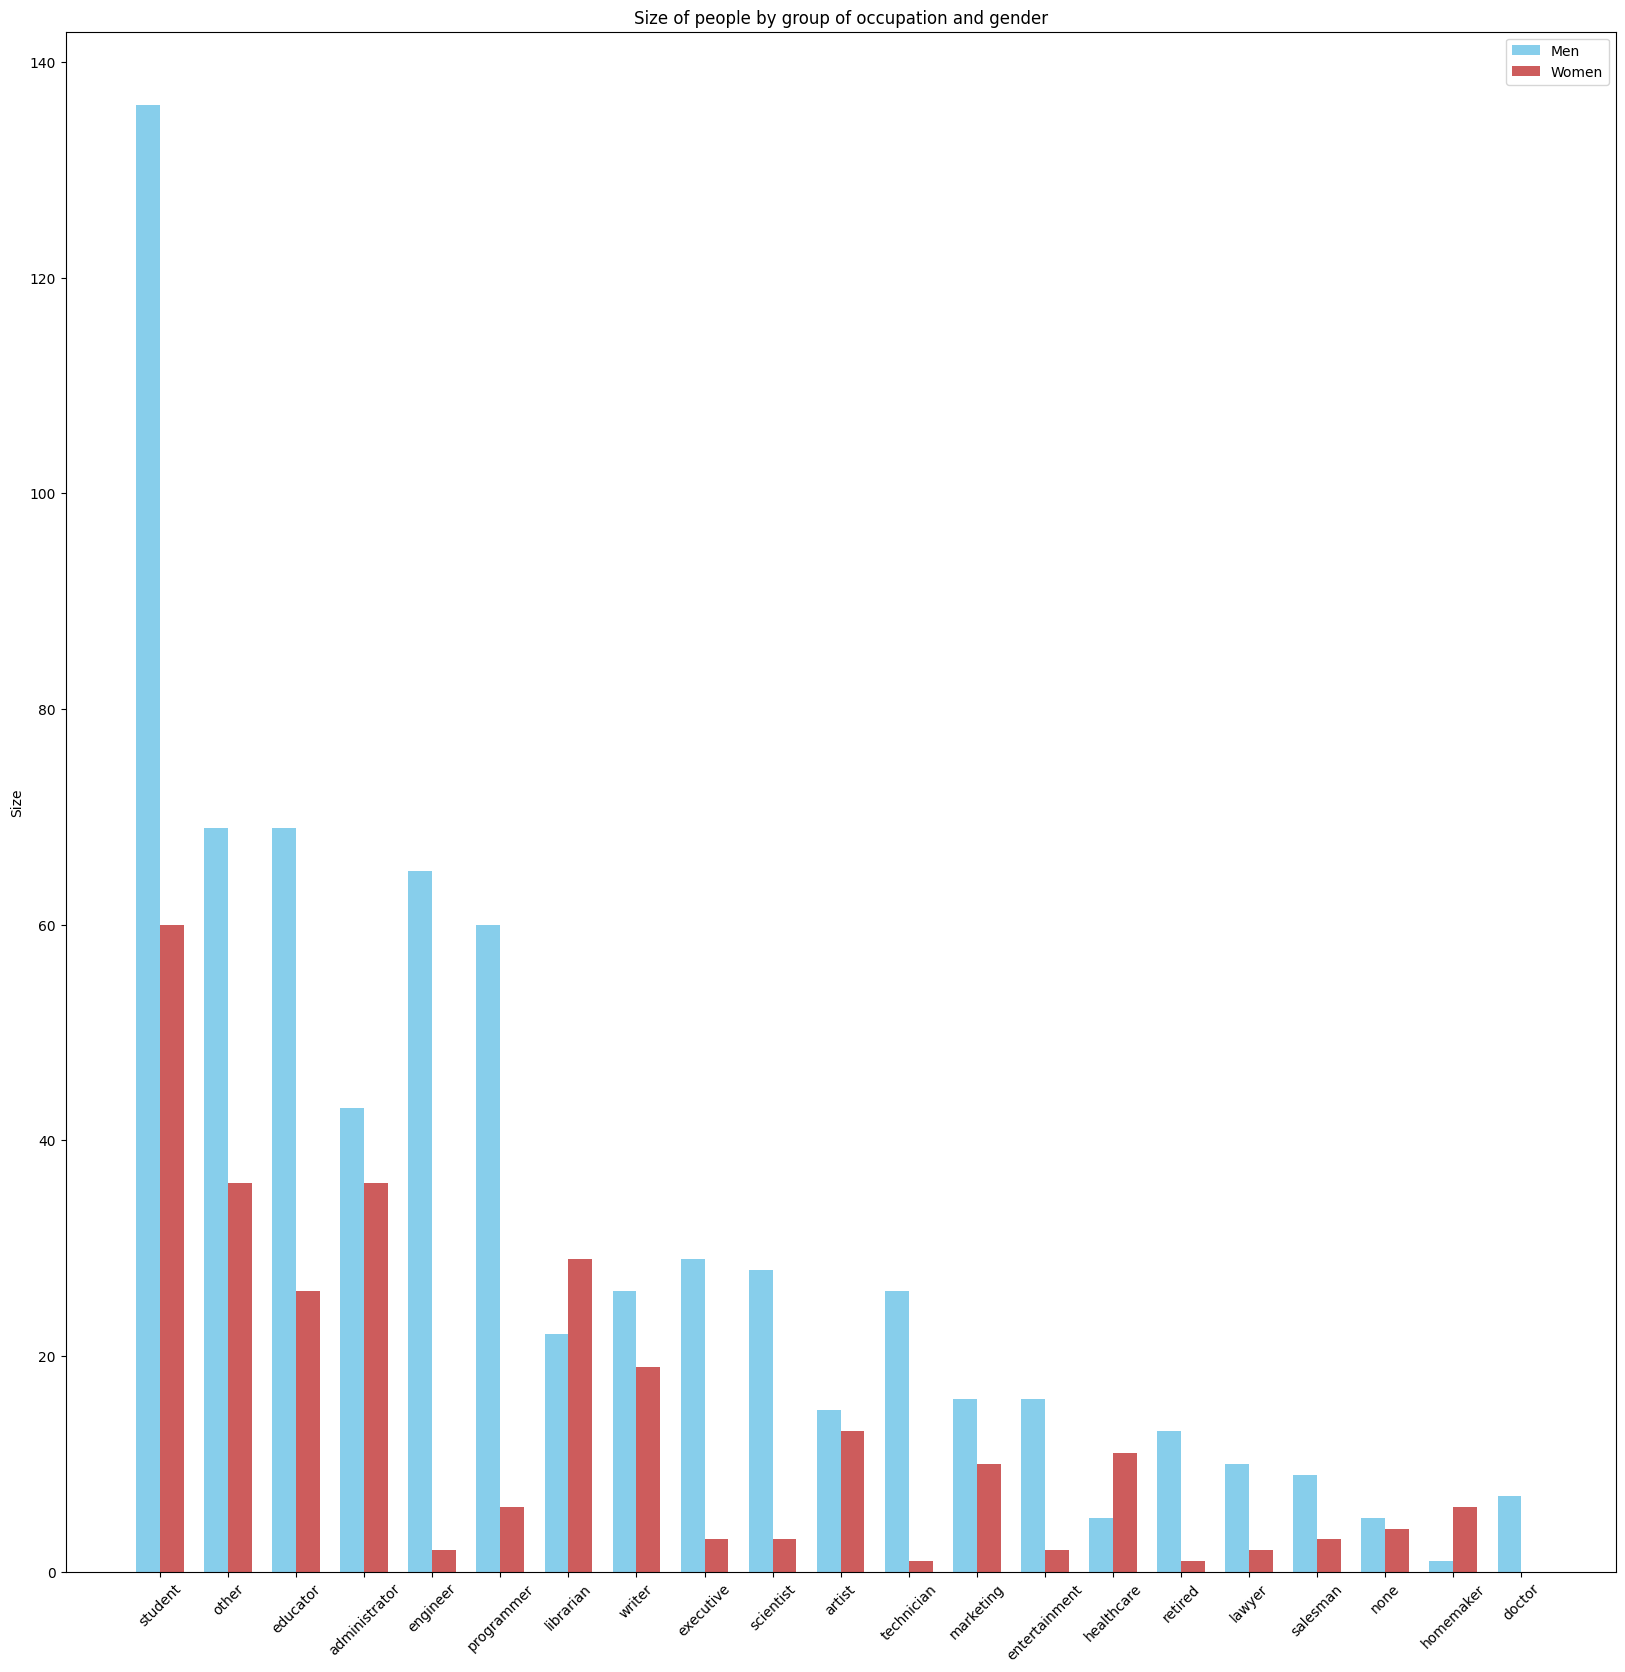

In [213]:
x=df.groupby(["occupation",'gender']).size().unstack().fillna(0)
x['Total']=x['F']+x['M']
sorted_x=x.sort_values(by='Total',ascending=False)
sorted_x[:10]

indexes=sorted_x.index
width = 0.35
fig, ax = plt.subplots(figsize=(20,20))
X_axis = np.arange(sorted_x.shape[0])

rects1 = ax.bar(X_axis-width/2,sorted_x.values[:,1],width, color='SkyBlue', label='Men')
rects2 = ax.bar(X_axis+width/2,sorted_x.values[:,0],width, color='IndianRed', label='Women')
ax.set_ylabel('Size')
ax.set_title('Size of people by group of occupation and gender')
ax.set_xticks(X_axis)
ax.set_xticklabels(indexes,rotation=45)
ax.legend()
plt.show()


In [137]:
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

In [188]:
x=df.groupby("occupation")['age'].mean()
x

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

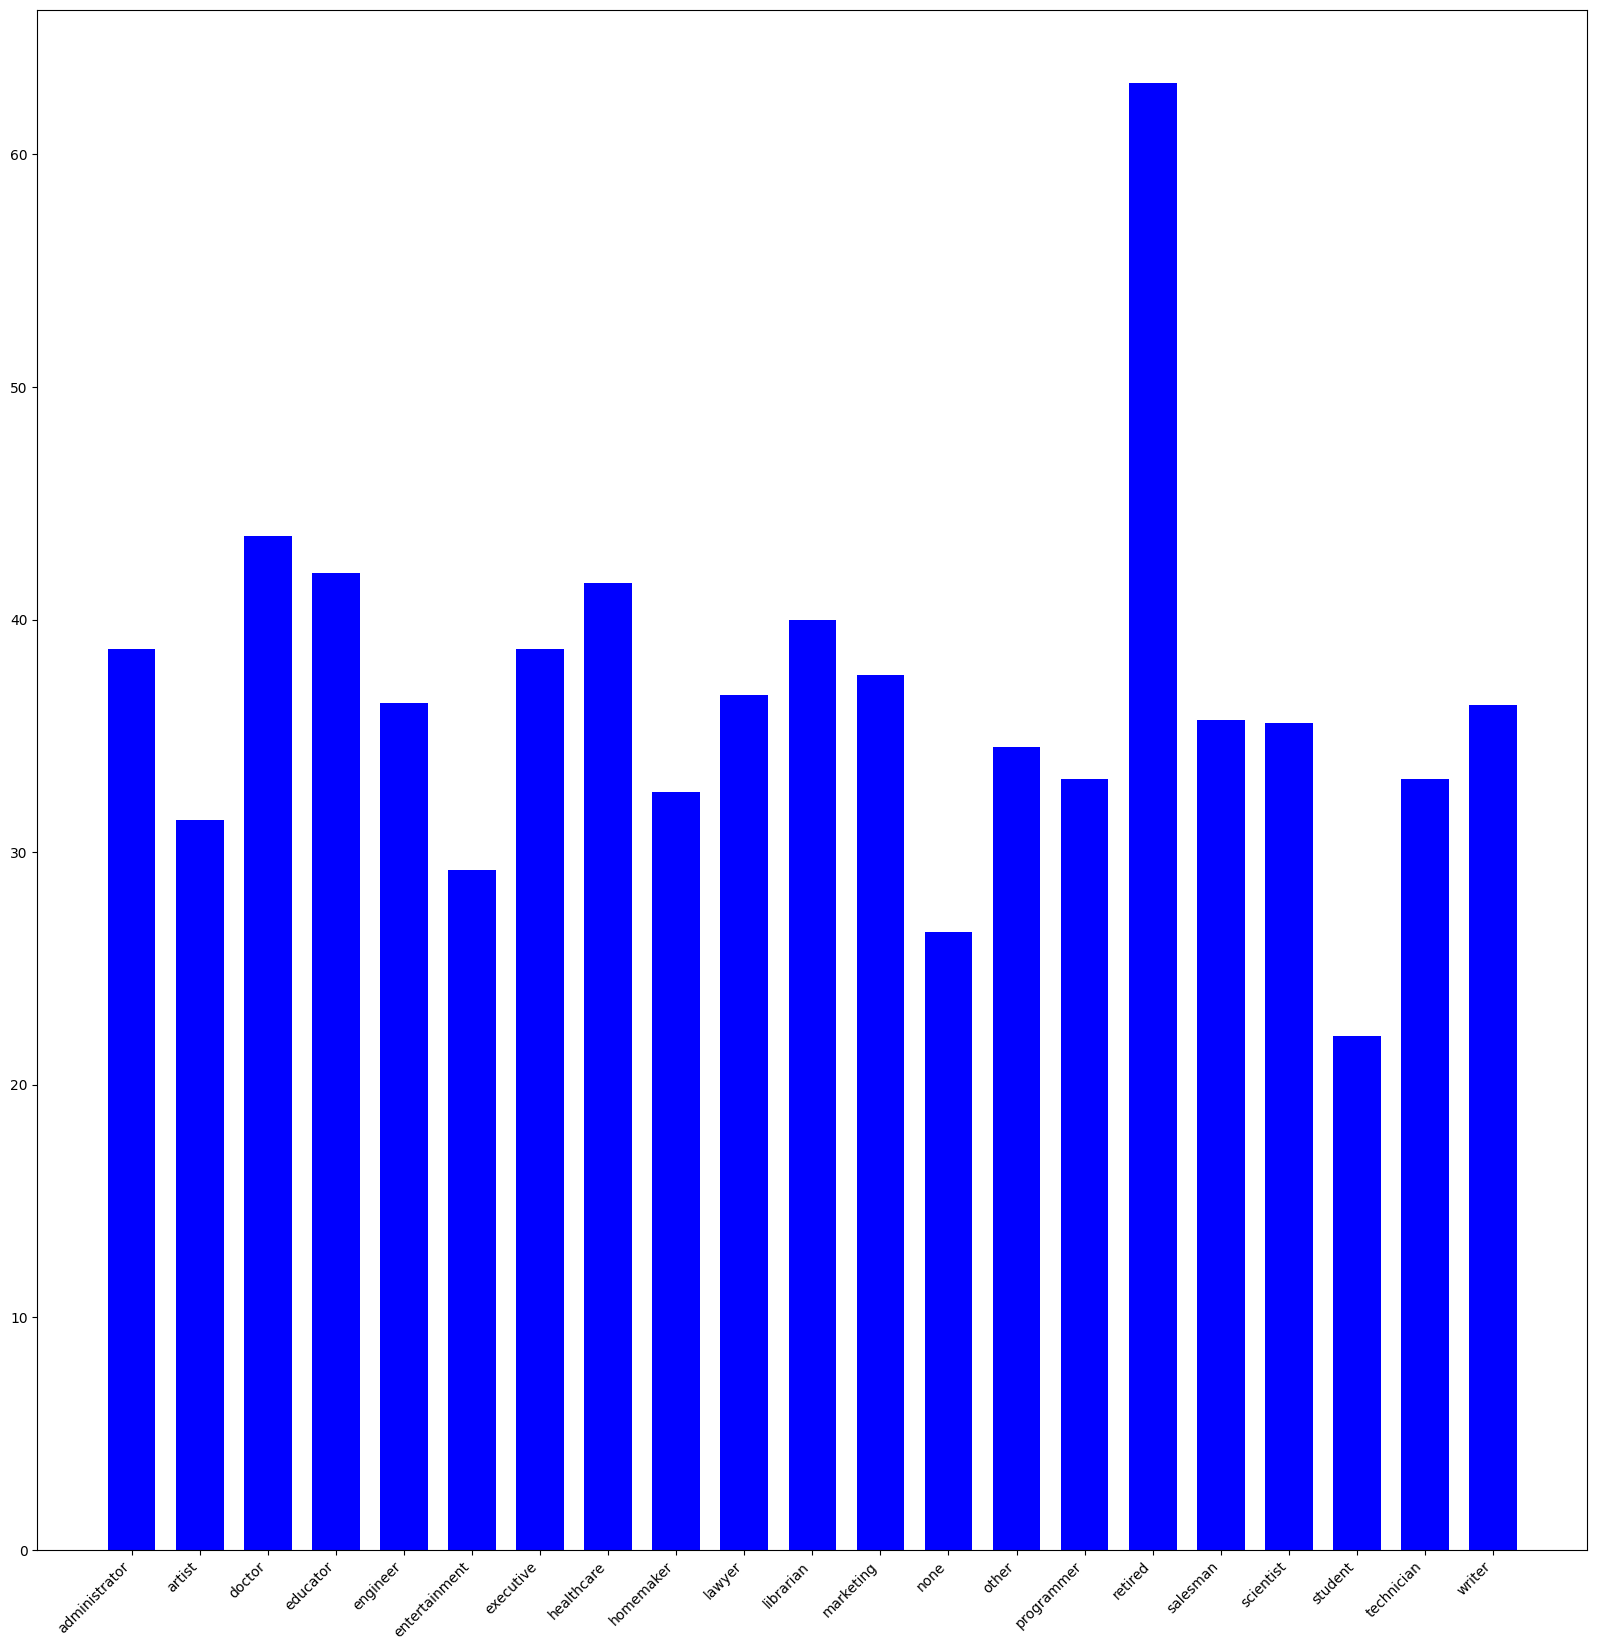

In [195]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.bar(x.index, x.values, color='blue', width=0.7)
ax.set_xticks(x.index) 
ax.set_xticklabels(x.index, rotation=45, ha='right')  
plt.show()


Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

In [152]:
x=df.groupby(["occupation","gender"])['age'].mean().unstack().fillna(0)
x

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,0.000000,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


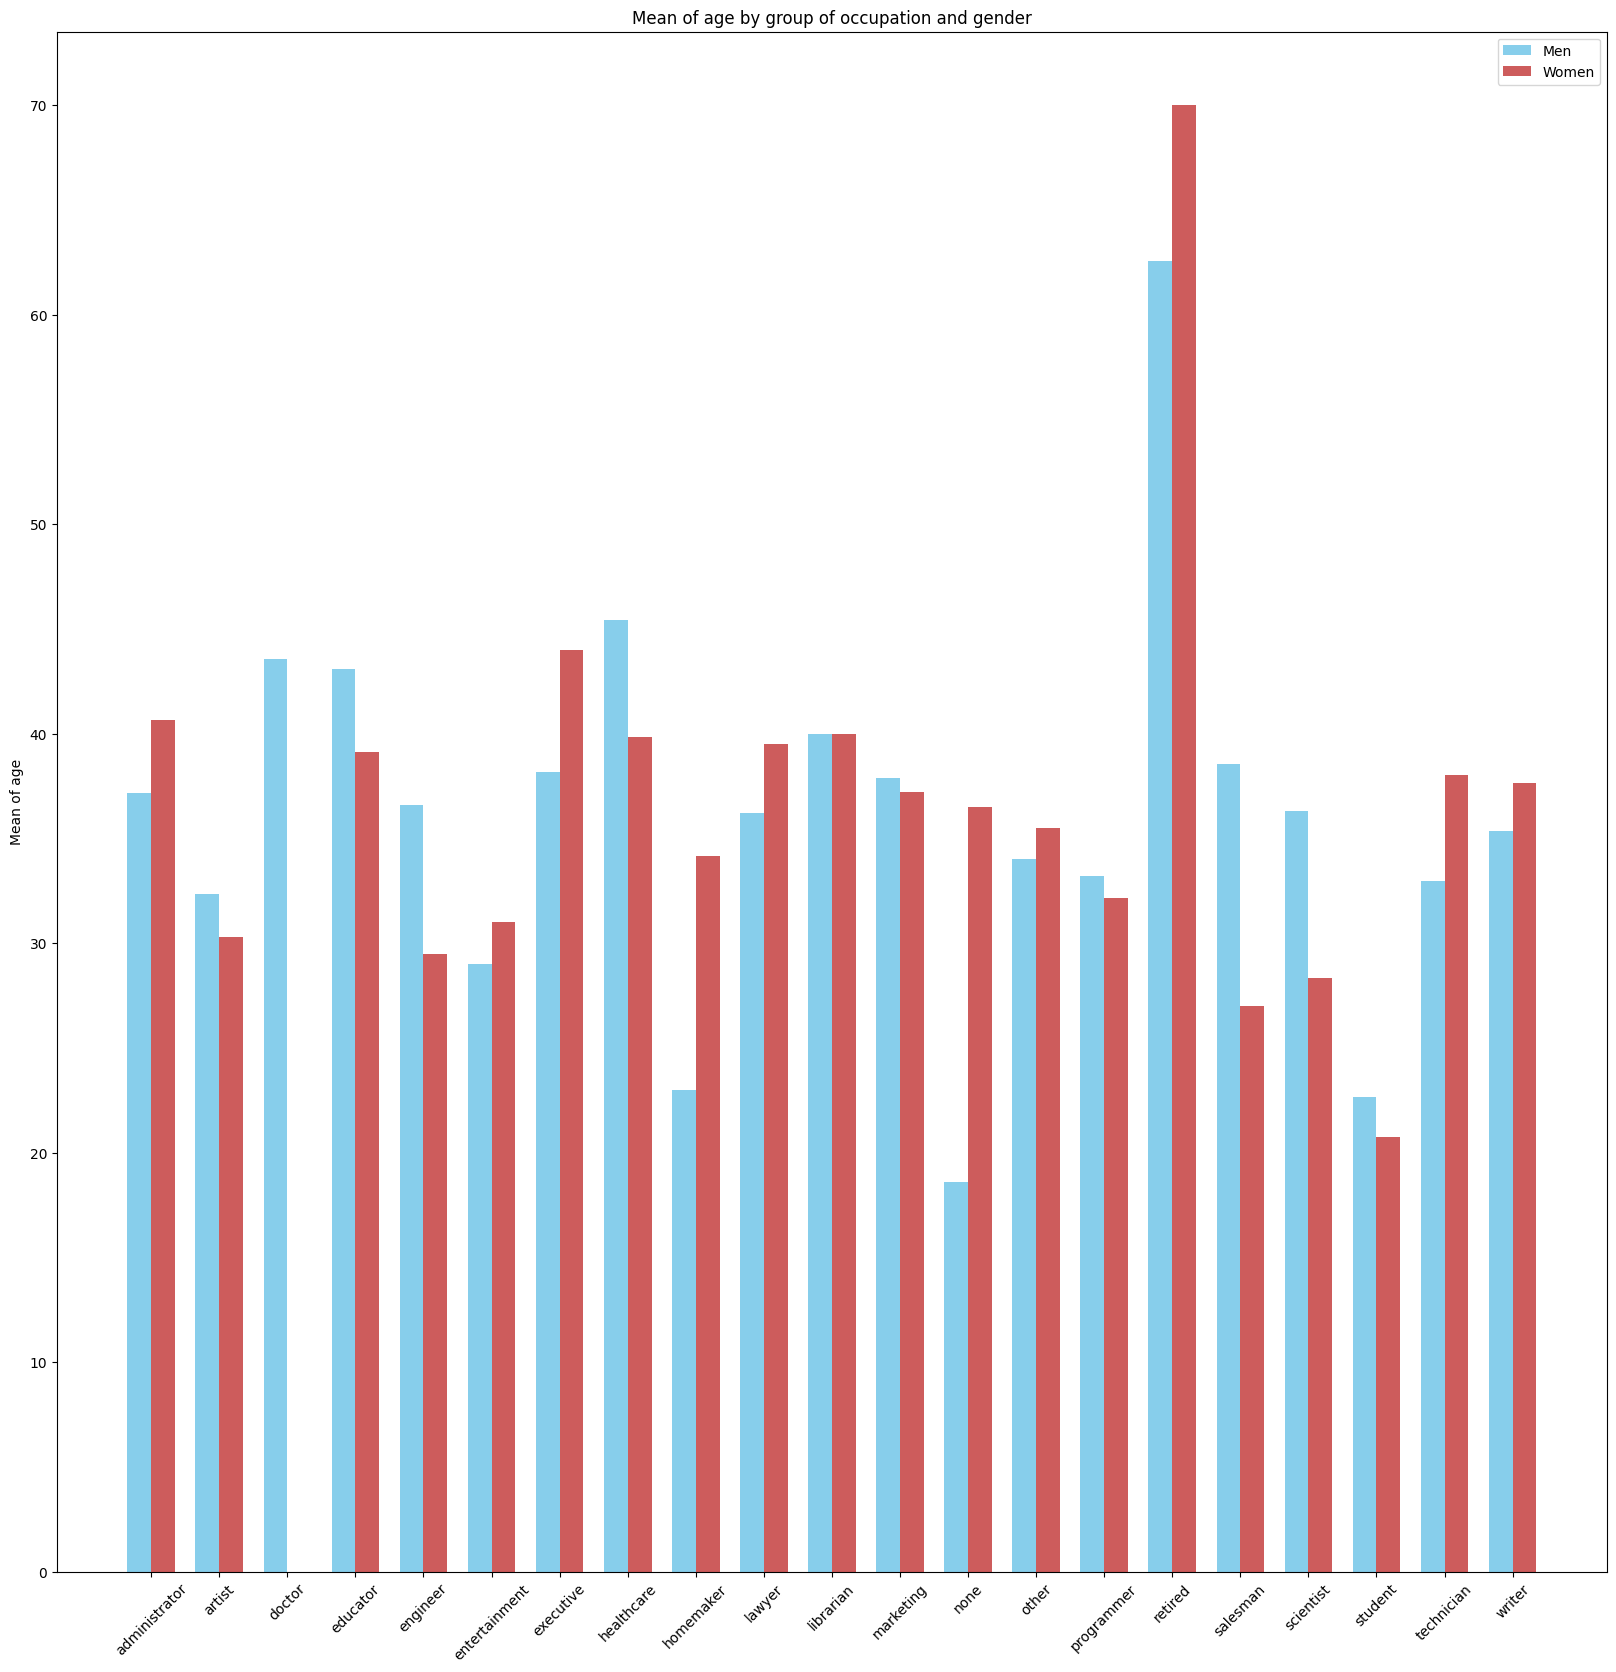

In [185]:
indexes=x.index
width = 0.35
fig, ax = plt.subplots(figsize=(20,20))
X_axis = np.arange(x.shape[0])

rects1 = ax.bar(X_axis-width/2,x.values[:,1],width, color='SkyBlue', label='Men')
rects2 = ax.bar(X_axis+width/2,x.values[:,0],width, color='IndianRed', label='Women')
ax.set_ylabel('Mean of age')
ax.set_title('Mean of age by group of occupation and gender')
ax.set_xticks(X_axis)
ax.set_xticklabels(indexes,rotation=45)
ax.legend()

plt.show()
